**How well do jobs and skills pay for Data Analysis**

Methology  
1. Evaluate median salary for top 6 data jobs  
2. Find median salary per skill for Data Analysts  
3. Visualize for highest paying skills and most demanded skills

Importing, Loading and Cleaning...

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

c:\Users\VINAMRA SHUKLA\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [3]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# filters for the job titles and country
df_US = df[(df['job_country'] == 'United States')].dropna(subset = ['salary_year_avg'])

In [6]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [7]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [12]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index

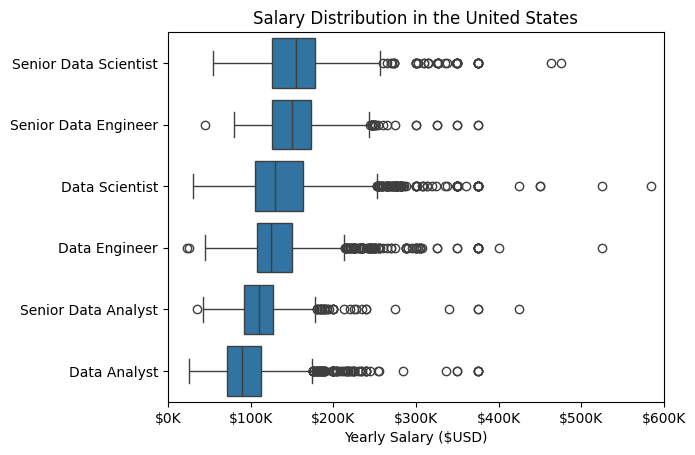

In [13]:
sns.boxplot(data = df_US_top6, x = 'salary_year_avg', y = 'job_title_short', order = job_order)

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = (plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()